In [1]:
# wget --post-data 'The quick brown fox jumped over the lazy dog.' 'localhost:9000/?properties={"annotators":"tokenize,ssplit,pos","outputFormat":"json"}' -O -

In [2]:
# annotate [-h] [-i INPUT] [-o OUTPUT] [-f {json}]
#                 [-a ANNOTATORS [ANNOTATORS ...]] [-s] [-v] [-m MEMORY]
#                 [-p PROPS [PROPS ...]]

In [1]:
import os
os.environ["CORENLP_HOME"] = '/home/shreya\stanford-corenlp-full-2018-02-27'

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000/')

In [2]:
text = (
  'can you search for machine learning job openings at LinkedIn')

In [3]:
output = nlp.annotate( text, properties = { 
    'annotators' : 'tokenize, ssplit, pos, depparse, parse',
    'outputFormat': 'json'})

In [4]:
output['sentences'][0].keys()

dict_keys(['index', 'parse', 'basicDependencies', 'enhancedDependencies', 'enhancedPlusPlusDependencies', 'tokens'])

In [5]:
print(output['sentences'][0]['parse'])

(ROOT
  (SINV (MD can)
    (NP (PRP you))
    (VP (VB search)
      (PP (IN for)
        (NP (NN machine) (NN learning) (NN job) (NNS openings)))
      (PP (IN at)
        (NP (NNP LinkedIn))))))


In [6]:
tokens = output['sentences'][0]['tokens']
lenDict = len(tokens)
for idx, token in enumerate(tokens):
    if(token['pos'] == 'NNP'):
        ans = token['originalText']
        while(idx + 1 < lenDict and tokens[idx + 1]['pos'] == 'NNP'):
            ans = ans + " " + token['originalText']

In [7]:
ans

'LinkedIn'

In [8]:
output['sentences'][0]

{'basicDependencies': [{'dep': 'ROOT',
   'dependent': 3,
   'dependentGloss': 'search',
   'governor': 0,
   'governorGloss': 'ROOT'},
  {'dep': 'aux',
   'dependent': 1,
   'dependentGloss': 'can',
   'governor': 3,
   'governorGloss': 'search'},
  {'dep': 'nsubj',
   'dependent': 2,
   'dependentGloss': 'you',
   'governor': 3,
   'governorGloss': 'search'},
  {'dep': 'case',
   'dependent': 4,
   'dependentGloss': 'for',
   'governor': 8,
   'governorGloss': 'openings'},
  {'dep': 'compound',
   'dependent': 5,
   'dependentGloss': 'machine',
   'governor': 8,
   'governorGloss': 'openings'},
  {'dep': 'compound',
   'dependent': 6,
   'dependentGloss': 'learning',
   'governor': 8,
   'governorGloss': 'openings'},
  {'dep': 'compound',
   'dependent': 7,
   'dependentGloss': 'job',
   'governor': 8,
   'governorGloss': 'openings'},
  {'dep': 'nmod',
   'dependent': 8,
   'dependentGloss': 'openings',
   'governor': 3,
   'governorGloss': 'search'},
  {'dep': 'case',
   'dependent'

In [9]:
depTreeStr = output['sentences'][0]['parse']
print(depTreeStr)

(ROOT
  (SINV (MD can)
    (NP (PRP you))
    (VP (VB search)
      (PP (IN for)
        (NP (NN machine) (NN learning) (NN job) (NNS openings)))
      (PP (IN at)
        (NP (NNP LinkedIn))))))


In [27]:
# import spacy
# from spacy.symbols import nsubj, VERB

# nlp = spacy.load('en_core_web_sm')
# doc = nlp('search for machine learning job openings at LinkedIn')

# for token in doc:
#     print(tok.text for toc in token.lefts)

# # print([token.text for token in doc.lefts])

In [10]:
import nltk
from nltk.tree import Tree

In [14]:
# dir(Tree)
# help(Tree.fromstring)

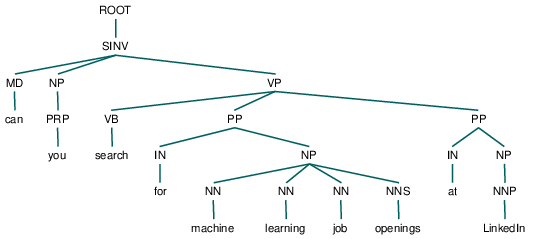

In [11]:
depTree = Tree.fromstring(depTreeStr)
depTree

findsubtree(root)
    for each child of the root node, check if the leaf == operation (search/add):
        if(yes):
            return the parent of the child

parent = findsubtree(ptree)
nchildren = findchildren(parent)
if(nchildren <= 2):
    position = ""
else:
    for each child in parent:
        if any word is synoymous to job/opening:
            return the parent of this subtree

### for each leaf node, if it is synonymous to job/opening, return the parent node.
find words dependent on job/opening and return 

In [23]:
# find synonyms to job, openings, positions
from LinkedIn_Operation_identification import findSynonyms

In [53]:
synJob = findSynonyms('job')
JobSyn = []
for syn in synJob:
    if syn not in JobSyn:
        JobSyn.append(syn)

# JobSyn

synOpen = findSynonyms('openings')
OpenSyn = ['opening']
for syn in synOpen:
    if syn not in OpenSyn:
        OpenSyn.append(syn)

# OpenSyn

synPos = findSynonyms('position')
PosSyn = []
for syn in synPos:
    if syn not in PosSyn:
        PosSyn.append(syn)

# PosSyn

In [54]:
OpenSyn

['opening', 'openings', 'Doors', 'ora', 'pore', 'crowd', 'space']

In [16]:
# dir(depTree)
# dir(depTree.subtrees())

In [17]:
sub = depTree.subtrees()

In [18]:
from nltk.tree import ParentedTree
ptree = ParentedTree.fromstring(depTreeStr)

In [58]:
leaf_values = ptree.leaves()

for word in OpenSyn:
    if word in leaf_values:
        leaf_index = leaf_values.index(word)
        tree_location = ptree.leaf_treeposition(leaf_index)
        print (tree_location)
        print (ptree[tree_location])
        break

(0, 2, 1, 1, 3, 0)
openings


In [61]:
treeLoc = tree_location[:-2]
treeLoc

(0, 2, 1, 1)

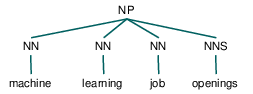

In [66]:
subtree = ptree[treeLoc]
subtree

In [69]:
childNodes = subtree.leaves()
childNodes

['machine', 'learning', 'job', 'openings']

In [72]:
position = (" ".join(childNodes))
position

'machine learning job openings'

In [15]:
def findNchildren(ptree):
    nchild = 0
    for tree in ptree:
        for child in tree:
            nchild += 1
    return nchild

In [62]:
# # print(ptree.label())
# nchildren = 0
# for tr in ptree:
#     for sub in tr:
#         print(sub)
#         nchildren += 1
#     print("\n")
    
# nchildren

In [76]:
nchildren = findNchildren(ptree)
# if nchildren <= 2 => only operation and name exists, find nothing

# if(nchildren > 2):
print(nchildren)


3


In [32]:
for tr in sub:
    subT = tr
    for s in subT:
        print(type(s))
        print(s)
    print("\n")

<class 'nltk.tree.Tree'>
(FRAG
  (NP (NN search))
  (PP
    (IN for)
    (NP (NN machine) (NN learning) (NN job) (NNS openings)))
  (PP (IN at) (NP (NNP LinkedIn))))


<class 'nltk.tree.Tree'>
(NP (NN search))
<class 'nltk.tree.Tree'>
(PP (IN for) (NP (NN machine) (NN learning) (NN job) (NNS openings)))
<class 'nltk.tree.Tree'>
(PP (IN at) (NP (NNP LinkedIn)))


<class 'nltk.tree.Tree'>
(NN search)


<class 'str'>
search


<class 'nltk.tree.Tree'>
(IN for)
<class 'nltk.tree.Tree'>
(NP (NN machine) (NN learning) (NN job) (NNS openings))


<class 'str'>
for


<class 'nltk.tree.Tree'>
(NN machine)
<class 'nltk.tree.Tree'>
(NN learning)
<class 'nltk.tree.Tree'>
(NN job)
<class 'nltk.tree.Tree'>
(NNS openings)


<class 'str'>
machine


<class 'str'>
learning


<class 'str'>
job


<class 'str'>
openings


<class 'nltk.tree.Tree'>
(IN at)
<class 'nltk.tree.Tree'>
(NP (NNP LinkedIn))


<class 'str'>
at


<class 'nltk.tree.Tree'>
(NNP LinkedIn)


<class 'str'>
LinkedIn


